# *Introduction to the hands-on project:* 
# Cognitive skills impact on fMRI restings state intrinsic connectivity

The aim of this 6-day project is to familiarize you with the basic steps of functional connectivity analysis by working with openly available tools and data.

Throughout the course example datasets will be used in these notebooks. However, all the notebooks can run the necessary code, so feel free to alter the dataset, analytic approach, visualization, etc... as much as you would like. 

## Project Schedule:

| Day    | Topic   | Notebook  |
| :------: | :------- | :--------- |
| 1 | Downloading data | `1_selecting_data.ipynb` |
| 1 | Beginning preprocessing | `2_preprocessing_mri_data.ipynb` |
| 2 | Connectivity analysis | `4_computing_connectivity.ipynb` |
| 3 | Working with behavioral data | `3_behavioral_data.ipynb` |
| 4-5 | Group-level analyses | `5_group-level_analysis.ipynb` |
| 6 | Data visualization techniques | `6_visualizing_results.ipynb` |

# 1. Selecting data

There is plenty of openly available MRI and behavioral data openly available for download.  
To begin, using the [Chrome browser](https://www.google.com/chrome/), go to: [openneuro.org](https://www.openneuro.org)  

One of the advantages of all data available at [openneuro.org](https://www.openneuro.org) is that it is already prepared in [BIDS format](https://bids.neuroimaging.io), which is a standard directory structure and file naming convention that enables the easy use of a broad range of analysis tools called [BIDS Apps](https://bids-apps.neuroimaging.io). (*We'll be using the BIDS App [fmriprep](http://fmriprep.readthedocs.io/) for MRI data preprocessing in the next section.*)  

## Choosing a dataset

When searching through [openneuro.org](https://openneuro.org), look for a dataset that has a behavioral measure that is of interest to you.  

[Available datasets at openneuro.org](https://openneuro.org/public/datasets)

Other resources for finding a BIDS-compatible dataset:
- [INDI](http://fcon_1000.projects.nitrc.org): 
- [datalad](https://www.datalad.org): 
- [Human Connectome Project (HCP)](https://www.humanconnectome.org):

## Downloading

Download the dataset, unzip it, and place it into the `data` directory. 

In [ ]:
! datalad install -g https://github.com/OpenNeuroDatasets/ds000245.git

# 3. Preprocessing the MRI data

Preprocessing of MRI data is the first stage of any analysis, and generally involves the following steps:

1. slice-timing / motion correction
2. registration
3. extracting confound regressors 

## Preprocessing using `fmriprep`

`fmriprep` allows us to use optimized pipelines...

Open a terminal window and execute the following command:

In [ ]:
# Faster version using '--sloppy' (this is only used in the course due to our tight schedule): 
docker run -ti --rm \
  -v /home/padawan/cajalcourse/ds000245:/data:ro \
  -v /home/padawan/cajalcourse/ds000245_preproc:/out \
  -v /home/padawan/cajalcourse:/fs poldracklab/fmriprep:latest \
  --fs-no-reconall  \
  --output-spaces MNI152NLin2009cAsym \
  --force-no-bbr \
  --dummy-scans 4 \
  --sloppy \
  --notrack \
  --n_cpus 6 \
  --mem_mb 12000 \
  --participant_label sub-CTL01 sub-CTL02 sub-CTL03 sub-CTL04 \
  --fs-license-file /fs/license.txt \
  /data /out participant

## Quality control

`fmriprep` outputs various **quality control** metrics on the participant-level that are viewable through an html page.

# Working with behavioral/phenotypic data

## 1. Loading the behavioral data

Locate the file containing the behavioral data `.tsv` or `.csv` file:

In [1]:
import pandas as pd

subject = 'CON02'
confounds_file = '/data/rw_eleves/CajalProject12/preproc/fmriprep/sub-%s/ses-postop/func/sub-%s_ses-postop_task-rest_desc-confounds_regressors.tsv' % (subject, subject)              



In [2]:
print(confounds_file)

/data/rw_eleves/CajalProject12/preproc/fmriprep/sub-CON02/ses-postop/func/sub-CON02_ses-postop_task-rest_desc-confounds_regressors.tsv


In [3]:
cf_all = pd.read_csv(confounds_file, delimiter='\t')

In [7]:
cf_all.columns

Index(['csf', 'csf_derivative1', 'csf_power2', 'csf_derivative1_power2',
       'white_matter', 'white_matter_derivative1',
       'white_matter_derivative1_power2', 'white_matter_power2',
       'global_signal', 'global_signal_derivative1',
       ...
       'motion_outlier05', 'motion_outlier06', 'motion_outlier07',
       'motion_outlier08', 'motion_outlier09', 'motion_outlier10',
       'motion_outlier11', 'motion_outlier12', 'motion_outlier13',
       'motion_outlier14'],
      dtype='object', length=205)

In [5]:

cf = cf_all.filter(['csf',
                    'white_matter',
                    'global_signal', 
                    'trans_x', 
                    'trans_y', 
                    'trans_z', 
                    'rot_x', 
                    'rot_y', 
                    'rot_z'], axis=1)

In [8]:

cf.to_csv(path_or_buf='/data/rw_eleves/CajalProject12/preproc/fmriprep/sub-%s/ses-postop/func/sub-%s_ses-postop_task-rest_desc-confounds_regressors_selected.csv' % (subject,subject), index=False)

In [11]:
confounds_name = '/data/rw_eleves/CajalProject12/preproc/fmriprep/sub-%s/ses-postop/func/sub-%s_ses-postop_task-rest_desc-confounds_regressors_selected.csv' % (subject,subject)


In [12]:
confounds_name

'/data/rw_eleves/CajalProject12/preproc/fmriprep/sub-CON02/ses-postop/func/sub-CON02_ses-postop_task-rest_desc-confounds_regressors_selected.csv'

In [13]:
import sklearn
import sklearn.datasets

# use load command from nilearn
# not glob, because it reorders

dataset = sklearn.datasets.base.Bunch(func=['/data/rw_eleves/CajalProject12/preproc/fmriprep/sub-%s/ses-postop/func/sub-%s_ses-postop_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' % (subject, subject)], 
                                      confounds=[confounds_name])



In [94]:
import sklearn
import sklearn.datasets

# use load command from nilearn
# not glob, because it reorders

dataset = sklearn.datasets.base.Bunch(func=['/data/rw_eleves/CajalProject12/ABIDE_pcp/cpac/nofilt_noglobal/Olin_0050102_func_preproc.nii.gz'], 
                                      confounds=['BABAB'])

In [95]:
dataset

{'func': ['/data/rw_eleves/CajalProject12/ABIDE_pcp/cpac/nofilt_noglobal/Olin_0050102_func_preproc.nii.gz'],
 'confounds': ['BABAB']}

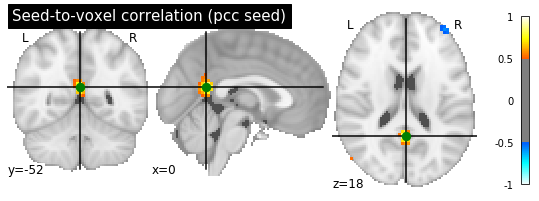

In [42]:
%matplotlib inline

import nilearn
from nilearn import plotting
import joblib
from nilearn import input_data
import numpy as np

motor_coords = [(-36, -28, 56)]
pcc_coords = [(0, -52, 18)]
ba45_coords = [(-52, 28, 2)]
precun = [(0, -66, 46)]

seed_masker = input_data.NiftiSpheresMasker(
    pcc_coords, radius=4,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2.4,
    memory='nilearn_cache', memory_level=1, verbose=0)

seed_time_series = seed_masker.fit_transform(dataset.func[0], confounds=[dataset.confounds[0]])

brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=6,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2.4,
    memory='nilearn_cache', memory_level=1, verbose=0)

brain_time_series = brain_masker.fit_transform(dataset.func[0], confounds=[dataset.confounds[0]]) 


seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series) /
                              seed_time_series.shape[0]
                              )

seed_to_voxel_correlations_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations.T)
display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.5, vmax=1,
                                 cut_coords=pcc_coords[0],
                                 title="Seed-to-voxel correlation (pcc seed)"
                                 )

display.add_markers(marker_coords=pcc_coords, marker_color='g',
                    marker_size=70)

# At last, we save the plot as pdf.
display.savefig('pcc_coords_seed_correlation.pdf')

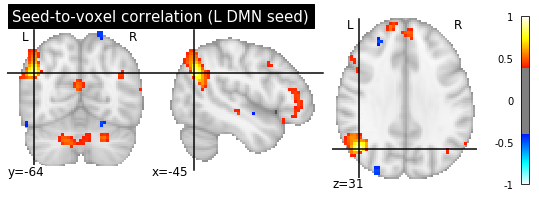

In [107]:
#Copy of the before steps for the ABIDE data
import nilearn
from nilearn import plotting
import joblib
from nilearn import input_data
import numpy as np

motor_coords = [(-36, -28, 56)]
pcc_coords = [(0, -52, 18)]
ba45_coords = [(-52, 28, 2)]
precun = [(0, -66, 46)]
L_DMN = [(-45.8, -64.78,31.84)]

seed_masker = input_data.NiftiSpheresMasker(
   L_DMN, radius=4,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2,
    memory='nilearn_cache', memory_level=1, verbose=0)

seed_time_series = seed_masker.fit_transform(dataset.func[0] )

brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=6,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2,
    memory='nilearn_cache', memory_level=1, verbose=0)

brain_time_series = brain_masker.fit_transform(dataset.func[0]) 


seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series) /
                              seed_time_series.shape[0]
                              )

seed_to_voxel_correlations_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations.T)
display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.4, vmax=1,
                                 cut_coords= L_DMN[0],
                                 title="Seed-to-voxel correlation (L DMN seed)"
                                 )

display.add_markers(marker_coords=pcc_coords, marker_color='g',
                    marker_size=70)

# At last, we save the plot as pdf.
display.savefig('L_DMN_coords_seed_correlation_ABIDE_Test.pdf')

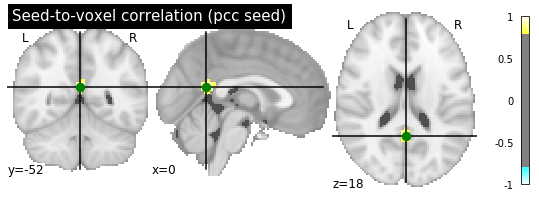

In [104]:
display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.8, vmax=1,
                                 cut_coords=pcc_coords[0],
                                 title="Seed-to-voxel correlation (pcc seed)"
                                 )

display.add_markers(marker_coords=pcc_coords, marker_color='g',
                    marker_size=70)

# At last, we save the plot as pdf.
display.savefig('pcc_coords_seed_correlation_ABIDE_Test.pdf')

In [73]:
# function to define a seed using its MNI coordinates and return voxel-wise correlations 
# with the seed, and save the image

def seed_cor(coords,name):
    seed_masker = input_data.NiftiSpheresMasker(
    coords, radius=4,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2.4,
    memory='nilearn_cache', memory_level=1, verbose=0)

    seed_time_series = seed_masker.fit_transform(dataset.func[0], confounds=[dataset.confounds[0]])

    brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=6,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2.4,
    memory='nilearn_cache', memory_level=1, verbose=0)

    brain_time_series = brain_masker.fit_transform(dataset.func[0], confounds=[dataset.confounds[0]]) 


    seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series) /
                              seed_time_series.shape[0]
                              )

    seed_to_voxel_correlations_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations.T)
    display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.5, vmax=1,
                                 cut_coords=coords[0],
                                 title="Seed-to-voxel correlation %s" % name
                                 )

    display.add_markers(marker_coords=coords, marker_color='g',
                    marker_size=70)

# At last, we save the plot as pdf.
    display.savefig('%s_coords_seed_correlation.pdf' % name)

    return display


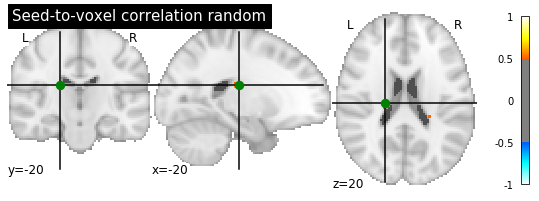

In [84]:
seed_cor(coords=[(-20, -20, 20)],name = 'random')

In [111]:
seed_to_voxel_correlations_fisher_z = np.arctanh(seed_to_voxel_correlations)
print("Seed-to-voxel correlation Fisher-z transformed: min = %.3f; max = %.3f"
      % (seed_to_voxel_correlations_fisher_z.min(),
         seed_to_voxel_correlations_fisher_z.max()
         )
      )

# Finally, we can tranform the correlation array back to a Nifti image
# object, that we can save.
seed_to_voxel_correlations_fisher_z_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations_fisher_z.T)
seed_to_voxel_correlations_fisher_z_img.to_filename(
    'L_DMN_ABIDE_seed_correlation_z.nii.gz') 

view = plotting.view_img_on_surf(seed_to_voxel_correlations_fisher_z_img, 
                                 threshold='80%')
view

Seed-to-voxel correlation Fisher-z transformed: min = -0.576; max = 1.641


/home/padawan/miniconda3/envs/cajal/lib/python3.7/site-packages/nilearn/plotting/js_plotting_utils.py:103: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than 10 '


### Day 3

Starting to develop our connectivity matrices for the ABIDE data set

In [4]:
from nilearn import datasets

/home/padawan/miniconda3/envs/cajal/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Compute connectivity matrix on single dataset

In [222]:
# Fetch all subjects 

ABIDE_data = datasets.fetch_abide_pcp(data_dir='/data/rw_eleves/CajalProject12', pipeline='cpac', 
                                 n_subjects = None, band_pass_filtering=False, global_signal_regression=False, derivatives=['func_preproc'], 
                                 quality_checked=True, url=None, verbose=0)

In [223]:
# Fetch the ROI-atlas (Harvard Oxford)

atlas = datasets.fetch_atlas_msdl()
atlas_filename = atlas.maps
labels = atlas['labels']

In [228]:
# Defining ROIs as seeds
from nilearn.input_data import NiftiMapsMasker

masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True, smoothing_fwhm=6,
    detrend=True, low_pass=0.1, high_pass=0.01, t_r=2,
    memory='nilearn_cache', verbose=5)

time_series = masker.fit_transform(ABIDE_data.func_preproc[0])

[NiftiMapsMasker.fit_transform] loading regions from /home/padawan/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.0s, 0.0min    : Loading resample_img...


/home/padawan/miniconda3/envs/cajal/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:302: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.6s, 0.0min
[Memory]0.8s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


# Only for n=1

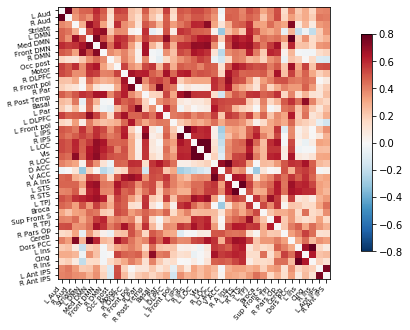

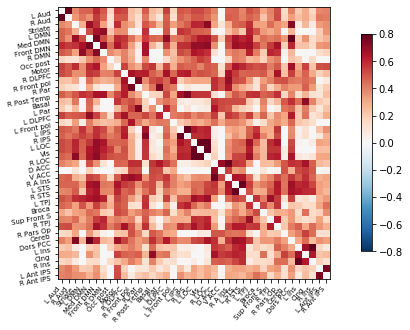

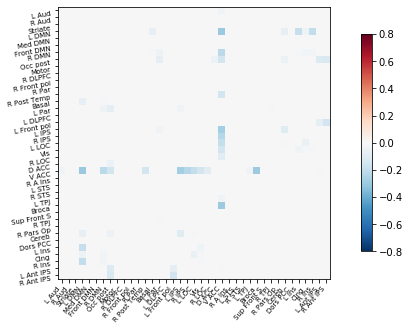

In [35]:
# Calculate correlation example for n=1
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Define positive matrix
correlation_matrix_pos = correlation_matrix.copy()
correlation_matrix_pos[correlation_matrix < 0.0] = 0.0

# Define negative matrix
correlation_matrix_neg = correlation_matrix.copy()
correlation_matrix_neg[correlation_matrix > 0.0] = 0.0

# Display the full correlation matrix
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True,
                     vmax=0.8, vmin=-0.8)

# Display the positive correlation matrix
np.fill_diagonal(correlation_matrix_pos, 0)
plotting.plot_matrix(correlation_matrix_pos, labels=labels, colorbar=True,
                     vmax=0.8, vmin=-0.8)


# Display the negative correlation matrix
np.fill_diagonal(correlation_matrix_neg, 0)
plotting.plot_matrix(correlation_matrix_neg, labels=labels, colorbar=True,
                     vmax=0.8, vmin=-0.8)

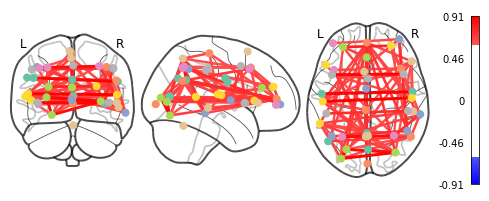

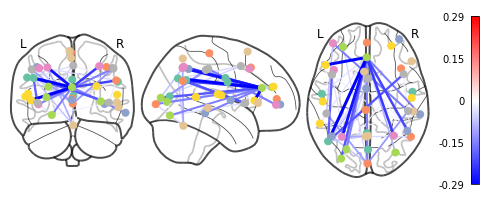

In [36]:
# Plotting the connectome
from nilearn import plotting
coords = atlas.region_coords

# We threshold to keep only the 20% of edges with the highest value
# because the graph is very dense
plotting.plot_connectome(correlation_matrix_pos, coords,
                         edge_threshold="90%", colorbar=True)

plotting.show()

# We threshold to keep only the 20% of edges with the highest value
# because the graph is very dense
plotting.plot_connectome(correlation_matrix_neg, coords,
                         edge_threshold="90%", colorbar=True)

plotting.show()

# 3. Computing functional connectivity matrices

Now that we have our preprocessed data, we can begin the functional connectivity analysis.  

We begin by loading the data:

[NeuroSynth](http://neurosynth.org/locations/)

In [229]:
# Matrix plotting from Nilearn: nilearn.plotting.plot_matrix
import numpy as np
import matplotlib.pylab as plt

def plot_matrices(matrices, matrix_kind):
    n_matrices = len(matrices)
    fig = plt.figure(figsize=(n_matrices * 4, 4))
    for n_subject, matrix in enumerate(matrices):
        plt.subplot(1, n_matrices, n_subject + 1)
        matrix = matrix.copy()  # avoid side effects
        # Set diagonal to zero, for better visualization
        np.fill_diagonal(matrix, 0)
        vmax = np.max(np.abs(matrix))
        title = '{0}, subject {1}'.format(matrix_kind, n_subject)
        plotting.plot_matrix(matrix, vmin=-vmax, vmax=vmax, cmap='RdBu_r',
                             title=title, figure=fig, colorbar=True)

In [230]:
msdl_data = datasets.fetch_atlas_msdl()
msdl_coords = msdl_data.region_coords
n_regions = len(msdl_coords)
print('MSDL has {0} ROIs, part of the following networks :\n{1}.'.format(
    n_regions, msdl_data.networks))

MSDL has 39 ROIs, part of the following networks :
[b'Aud', b'Aud', b'Striate', b'DMN', b'DMN', b'DMN', b'DMN', b'Occ post', b'Motor', b'R V Att', b'R V Att', b'R V Att', b'R V Att', b'Basal', b'L V Att', b'L V Att', b'L V Att', b'D Att', b'D Att', b'Vis Sec', b'Vis Sec', b'Vis Sec', b'Salience', b'Salience', b'Salience', b'Temporal', b'Temporal', b'Language', b'Language', b'Language', b'Language', b'Language', b'Cereb', b'Dors PCC', b'Cing-Ins', b'Cing-Ins', b'Cing-Ins', b'Ant IPS', b'Ant IPS'].


/home/padawan/miniconda3/envs/cajal/lib/python3.7/site-packages/numpy/lib/npyio.py:2322: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [231]:
from nilearn import input_data

masker = input_data.NiftiMapsMasker(
    msdl_data.maps, resampling_target="data", t_r=2, detrend=True,
    low_pass=.1, high_pass=.01, memory='nilearn_cache', memory_level=1)

In [232]:
# Pulling out the groups + nec info
ABIDE_subjects = []
pooled_subjects = []
control_subjects = []
ABIDE_labels = []  # 1 if Autism, 2 if control
for func_file,  phenotypic in zip(
        ABIDE_data.func_preproc, ABIDE_data.phenotypic):
    time_series = masker.fit_transform(func_file)
    pooled_subjects.append(time_series)
    is_ABIDE = phenotypic['DX_GROUP']
    if is_ABIDE == 1:
        ABIDE_subjects.append(time_series)
    else:
        control_subjects.append(time_series)
    
    ABIDE_labels.append(is_ABIDE)

print('Data has {0} ABIDE subjects.'.format(len(ABIDE_subjects)))
print('Data has {0} control subjects.'.format(len(control_subjects)))

/home/padawan/miniconda3/envs/cajal/lib/python3.7/site-packages/nilearn/input_data/nifti_maps_masker.py:326: UserWarning: Persisting input arguments took 0.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  verbose=self.verbose)


Data has 320 ABIDE subjects.
Data has 428 control subjects.


In [233]:
from nilearn.connectome import ConnectivityMeasure

Correlations of ABIDE patients are stacked in an array of shape (320, 39, 39)
Mean correlation has shape (39, 39).


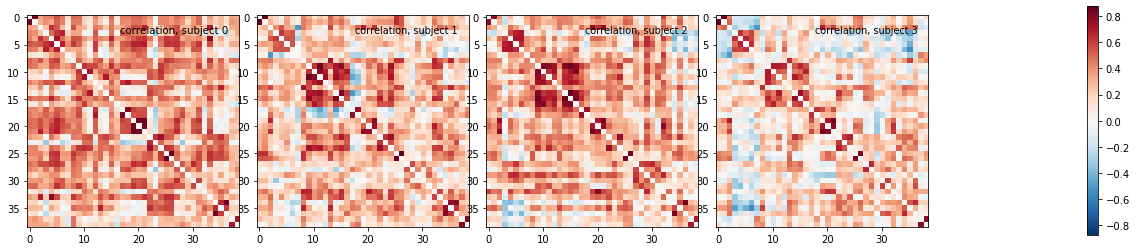

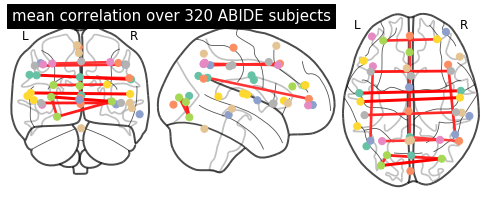

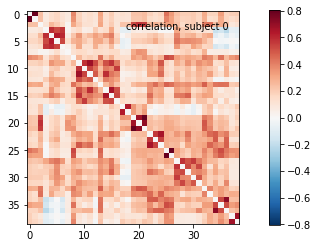

In [236]:
#creating correlation matrices for Autism subjects

correlation_measure_ABIDE = ConnectivityMeasure(kind='correlation')
correlation_matrices_ABIDE = correlation_measure_ABIDE.fit_transform(ABIDE_subjects)

# All individual coefficients are stacked in a unique 2D matrix.
print('Correlations of ABIDE patients are stacked in an array of shape {0}'
      .format(correlation_matrices_ABIDE.shape))

#Take mean correlation across autism group

mean_correlation_matrix_ABIDE = correlation_measure_ABIDE.mean_
print('Mean correlation has shape {0}.'.format(mean_correlation_matrix_ABIDE.shape))

from nilearn import plotting

#Plot the first 4 autism subjects and the the mean connectome across the autism group
plot_matrices(correlation_matrices_ABIDE[:4], 'correlation')
plotting.plot_connectome(mean_correlation_matrix_ABIDE, msdl_coords, edge_threshold = 0.6,
                         title='mean correlation over 320 ABIDE subjects')

mean_correlation_matrix_extra_ABIDE = np.expand_dims(mean_correlation_matrix_ABIDE, axis=0)
plot_matrices(mean_correlation_matrix_extra_ABIDE, 'correlation')

Correlations of control patients are stacked in an array of shape (428, 39, 39)
Mean correlation has shape (39, 39).


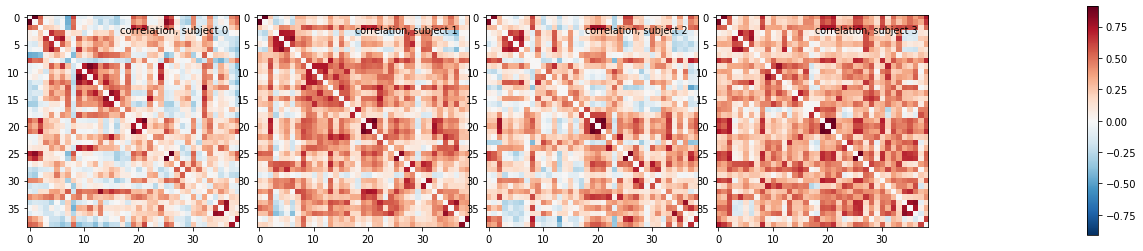

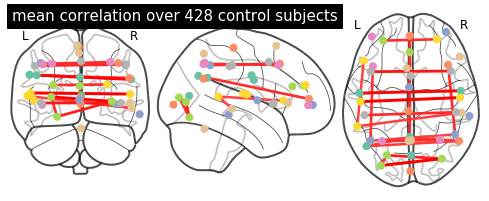

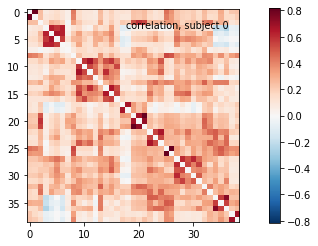

In [237]:
#creating correlation matrices for control subjects
correlation_measure_control = ConnectivityMeasure(kind='correlation')
correlation_matrices_control = correlation_measure_control.fit_transform(control_subjects)

# All individual coefficients are stacked in a unique 2D matrix.
print('Correlations of control patients are stacked in an array of shape {0}'
      .format(correlation_matrices_control.shape))

#Take mean correlation across control group

mean_correlation_matrix_control = correlation_measure_control.mean_
print('Mean correlation has shape {0}.'.format(mean_correlation_matrix_control.shape))

#Plot the first 4 control subjects and the the mean connectome across the control group
plot_matrices(correlation_matrices_control[:4], 'correlation')
plotting.plot_connectome(mean_correlation_matrix_control, msdl_coords, edge_threshold = 0.6,
                         title='mean correlation over 428 control subjects')

mean_correlation_matrix_extra_control = np.expand_dims(mean_correlation_matrix_control, axis=0)
plot_matrices(mean_correlation_matrix_extra_control, 'correlation')

# ---Day 4---

## Partial and Tangent correlation for both groups + plots

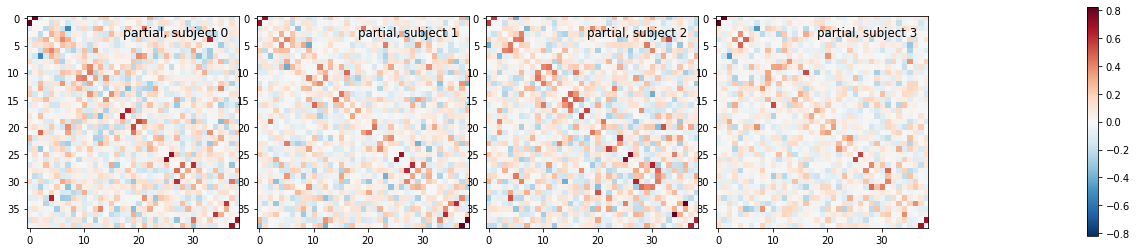

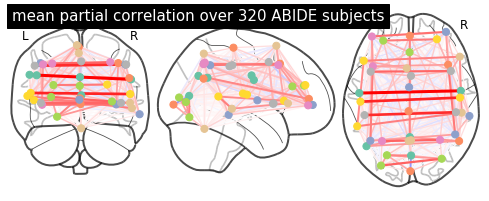

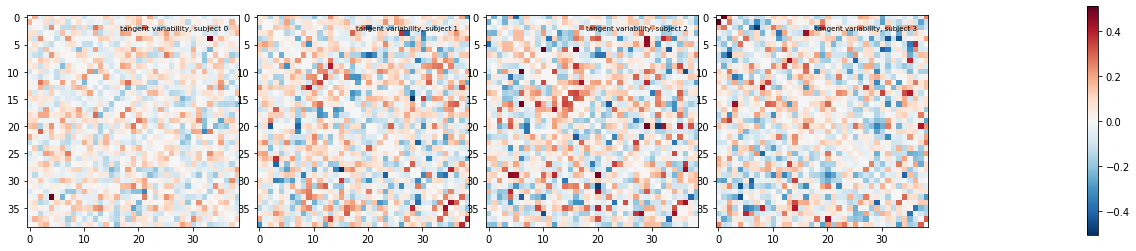

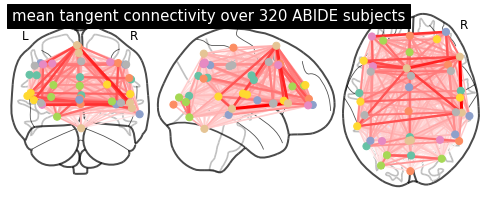

In [240]:
#partial and tangent correlation for the Autism group

partial_correlation_measure_ABIDE = ConnectivityMeasure(kind='partial correlation')

partial_correlation_matrices_ABIDE = partial_correlation_measure_ABIDE.fit_transform(
    ABIDE_subjects)

plot_matrices(partial_correlation_matrices_ABIDE[:4], 'partial')
plotting.plot_connectome(
    partial_correlation_measure_ABIDE.mean_, msdl_coords,
    title='mean partial correlation over 320 ABIDE subjects')

tangent_measure_ABIDE = ConnectivityMeasure(kind='tangent')
tangent_matrices_ABIDE = tangent_measure_ABIDE.fit_transform(ABIDE_subjects)
plot_matrices(tangent_matrices_ABIDE[:4], 'tangent variability')
plotting.plot_connectome(
    tangent_measure_ABIDE.mean_, msdl_coords,
    title='mean tangent connectivity over 320 ABIDE subjects')

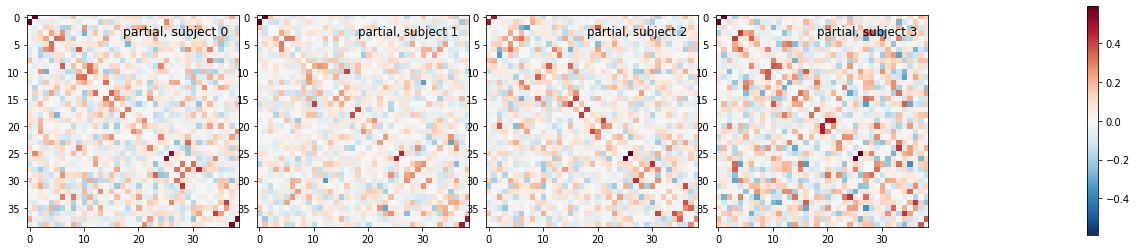

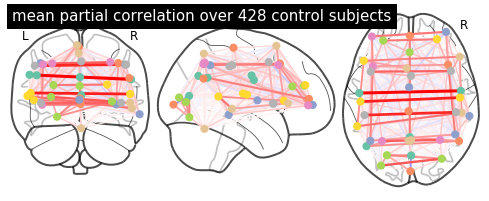

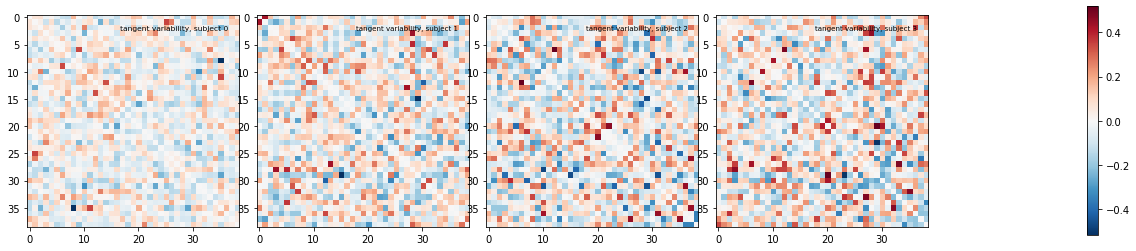

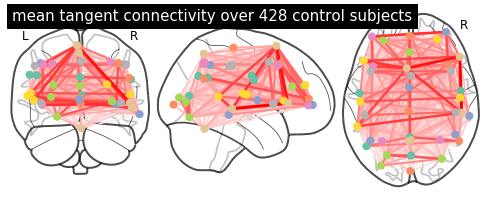

In [241]:
#partial and tangent correlation for the Control group

partial_correlation_measure_control = ConnectivityMeasure(kind='partial correlation')

partial_correlation_matrices_control = partial_correlation_measure_control.fit_transform(
    control_subjects)

plot_matrices(partial_correlation_matrices_control[:4], 'partial')
plotting.plot_connectome(
    partial_correlation_measure_control.mean_, msdl_coords,
    title='mean partial correlation over 428 control subjects')

tangent_measure_control = ConnectivityMeasure(kind='tangent')
tangent_matrices_control = tangent_measure_control.fit_transform(control_subjects)
plot_matrices(tangent_matrices_control[:4], 'tangent variability')
plotting.plot_connectome(
    tangent_measure_control.mean_, msdl_coords,
    title='mean tangent connectivity over 428 control subjects')

In [242]:
connectivity_biomarkers = {}
kinds = ['correlation', 'partial correlation', 'tangent']
for kind in kinds:
    conn_measure = ConnectivityMeasure(kind=kind, vectorize=True)
    connectivity_biomarkers[kind] = conn_measure.fit_transform(pooled_subjects)

# For each kind, all individual coefficients are stacked in a unique 2D matrix.
print('{0} correlation biomarkers for each subject.'.format(
    connectivity_biomarkers['correlation'].shape[1]))

780 correlation biomarkers for each subject.


In [243]:
from sklearn.model_selection import StratifiedKFold

"""
classes = ['{0}{1}'.format(ABIDE_label)
           for ABIDE_label in zip(ABIDE_labels)]
"""

cv = StratifiedKFold(n_splits=3)

In [244]:
# Note that in cv.split(X, y),
# providing y is sufficient to generate the splits and
# hence np.zeros(n_samples) may be used as a placeholder for X
# instead of actual training data.
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

mean_scores = []
for kind in kinds:
    svc = LinearSVC(random_state=0)
    cv_scores = cross_val_score(svc,
                                connectivity_biomarkers[kind],
                                y=ABIDE_labels,
                                cv=cv,
                                groups=ABIDE_labels,
                                scoring='accuracy',
                                )
    mean_scores.append(cv_scores.mean())


/home/padawan/miniconda3/envs/cajal/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/padawan/miniconda3/envs/cajal/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/padawan/miniconda3/envs/cajal/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


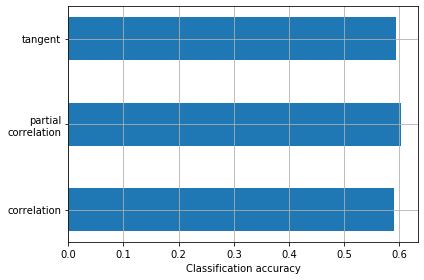

In [245]:
from nilearn.plotting import show

plt.figure(figsize=(6, 4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05)
yticks = [kind.replace(' ', '\n') for kind in kinds]
plt.yticks(positions, yticks)
plt.xlabel('Classification accuracy')
plt.grid(True)
plt.tight_layout()

show()

In [253]:
# We use glob and split to only get the Sub_IDs in the data that we have (i.e. those that passed QC)

import glob,os

# Use glob to get the names from the folder
path = '/data/rw_eleves/CajalProject12/ABIDE_pcp/cpac/nofilt_noglobal'

files = [f for f in glob.glob(path + "**/*.nii.gz", recursive=True)]

# Get and sort subject ID
Plist=[]
for test in files:
    base=os.path.basename(test)
    basenames = base.split('_')
    if (basenames[1]=="a") or (basenames[1]=="b") or (basenames[1]=="c") or (basenames[1]=="d") or (basenames[1]=="1") or (basenames[1]=="2"):
        Plist.append(int(basenames[2]))
    else:
        Plist.append(int(basenames[1]))

Plist = list(np.sort(Plist))

# Working with behavioral/phenotypic data


## 1. Loading the behavioral data

In [282]:
# Locate the file containing the behavioral data `.tsv` or `.csv` file:

import pandas as pd

behav = pd.read_csv('/data/rw_eleves/CajalProject12/ABIDE_pcp/Phenotypic_V1_0b_preprocessed1.csv', delimiter=',', na_values="-9999")

behav_short = behav.filter(['SUB_ID',
                   'subject', 'SITE_ID','DX_GROUP', 'DSM_IV_TR', 'AGE_AT_SCAN',  'SEX',
             'HANDEDNESS_CATEGORY', 'FIQ','VIQ', 'PIQ', 'FIQ_TEST_TYPE', 'VIQ_TEST_TYPE',
             'PIQ_TEST_TYPE',], axis=1)

behav_short = behav_short[behav_short['SUB_ID'].isin(Plist)] 


In [284]:
behav_short


SUB_ID  subject  SITE_ID  DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  SEX  \
1      50003    50003     PITT         1        1.0        24.45    1   
2      50004    50004     PITT         1        1.0        19.09    1   
3      50005    50005     PITT         1        1.0        13.73    2   
4      50006    50006     PITT         1        1.0        13.37    1   
5      50007    50007     PITT         1        1.0        17.78    1   
6      50008    50008     PITT         1        1.0        32.45    1   
8      50010    50010     PITT         1        1.0        35.20    1   
9      50011    50011     PITT         1        1.0        16.93    1   
10     50012    50012     PITT         1        1.0        21.48    1   
11     50013    50013     PITT         1        1.0         9.33    1   
12     50014    50014     PITT         1        1.0        14.20    1   
13     50015    50015     PITT         1        1.0        14.20    1   
14     50016    50016     PITT         1        1.0        21.82    1   
17     50020    50020     PITT         1        1.0        20.83    1   
18     50022    50022     PITT         1        1.0        16.99    1   
19     50023    50023     PITT         1        1.0        12.64    2   
20     50024    50024     PITT         1        1.0        22.64    1   
21     50025    50025     PITT         1        1.0        31.72    1   
22     50026    50026     PITT         1        1.0        16.28    1   
23     50027    50027     PITT         1        1.0        12.24    1   
24     50028    50028     PITT         1        1.0        12.74    1   
26     50030    50030     PITT         2        0.0        25.12    1   
27     50031    50031     PITT         2        0.0        12.92    1   
28     50032    50032     PITT         2        0.0        19.80    1   
29     50033    50033     PITT         2        0.0        12.15    1   
30     50034    50034     PITT         2        0.0        14.77    1   
31     50035    50035     PITT         2        0.0        17.36    1   
32     50036    50036     PITT         2        0.0        13.28    2   
33     50037    50037     PITT         2        0.0        19.16    1   
34     50038    50038     PITT         2        0.0        13.95    2   
...      ...      ...      ...       ...        ...          ...  ...   
1074   51488    51488  CALTECH         2        0.0        23.30    1   
1077   51491    51491  CALTECH         2        0.0        56.20    1   
1079   51493    51493  CALTECH         2        0.0        29.20    2   
1080   51556    51556      SBL         2        0.0        20.00    1   
1081   51557    51557      SBL         2        0.0        26.00    1   
1082   51558    51558      SBL         2        0.0        27.00    1   
1083   51559    51559      SBL         2        0.0        27.00    1   
1084   51560    51560      SBL         2        0.0        27.00    1   
1086   51562    51562      SBL         2        0.0        37.00    1   
1087   51563    51563      SBL         2        0.0        38.00    1   
1088   51564    51564      SBL         2        0.0        39.00    1   
1089   51565    51565      SBL         2        0.0        39.00    1   
1090   51566    51566      SBL         2        0.0        41.00    1   
1091   51567    51567      SBL         2        0.0        34.00    1   
1092   51568    51568      SBL         2        0.0        37.00    1   
1093   51569    51569      SBL         2        0.0        36.00    1   
1094   51570    51570      SBL         2        0.0        42.00    1   
1096   51572    51572      SBL         1        2.0        28.00    1   
1097   51573    51573      SBL         1        3.0        30.00    1   
1098   51574    51574      SBL         1        2.0        30.00    1   
1100   51576    51576      SBL         1        3.0        31.00    1   
1102   51578    51578      SBL         1        2.0        33.00    1   
1103   51579    51579      SBL         1        3.0        41.00

## 2. Check the distributions

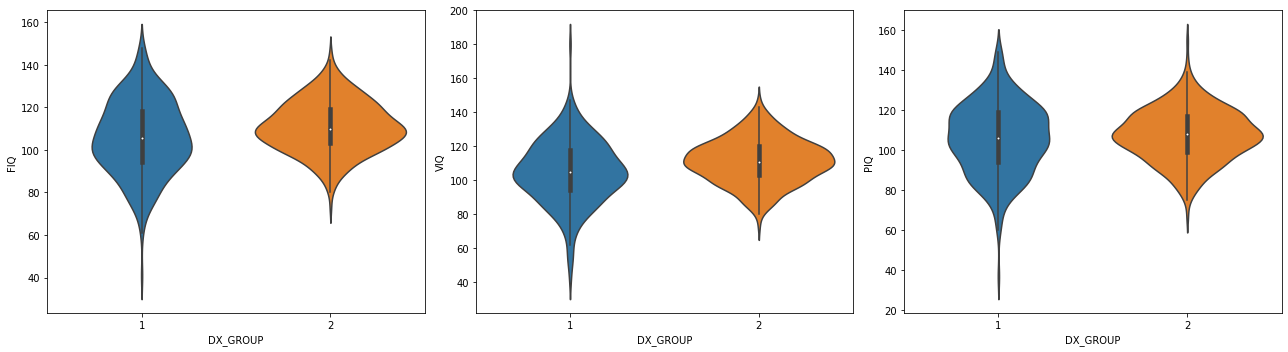

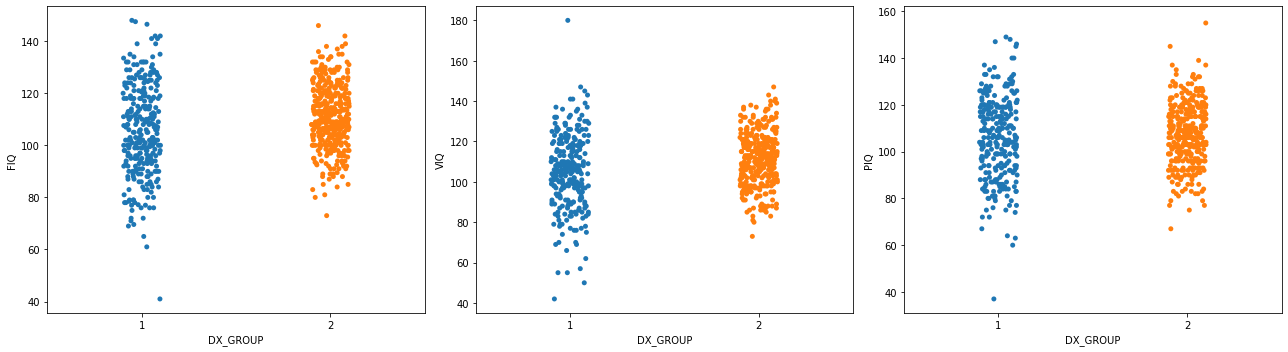

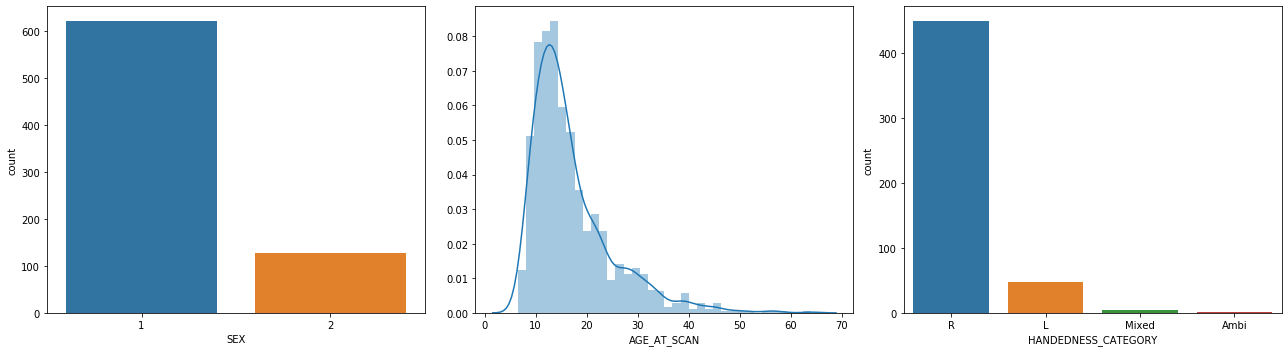

In [285]:
# Locate the measure-of-interest:

%matplotlib inline

# Next, plot a histogram of the values:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,5))
sns.violinplot(x=behav_short.DX_GROUP,y=behav_short.FIQ, ax=ax1)
sns.violinplot(x=behav_short.DX_GROUP,y=behav_short.VIQ,ax=ax2)
sns.violinplot(x=behav_short.DX_GROUP,y=behav_short.PIQ,ax=ax3)

fg, (ax4, ax5, ax6) = plt.subplots(1,3, figsize=(18,5))
sns.catplot(x="DX_GROUP",y="FIQ",data=behav_short, ax=ax4)
sns.catplot(x="DX_GROUP",y="VIQ",data=behav_short,ax=ax5)
sns.catplot(x="DX_GROUP",y="PIQ",data=behav_short,ax=ax6)
plt.close(4)
plt.close(5)
plt.close(3)

# needs to be fixed (to go on top)
'''
fh, (ax4, ax5, ax6) = plt.subplots(1,3, figsize=(18,5))
sns.distplot(behav_short.FIQ)
plt.show()
sns.distplot(behav_short.VIQ)
plt.show()
sns.distplot(behav_short.PIQ)
plt.show()
'''

f.tight_layout()
fg.tight_layout()


K, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,5))

sns.countplot(x='SEX', data=behav_short, ax=ax1)
sns.distplot(behav.AGE_AT_SCAN, ax=ax2)
sns.countplot(x='HANDEDNESS_CATEGORY',data=behav_short, ax=ax3 )

K.tight_layout()
plt.show()

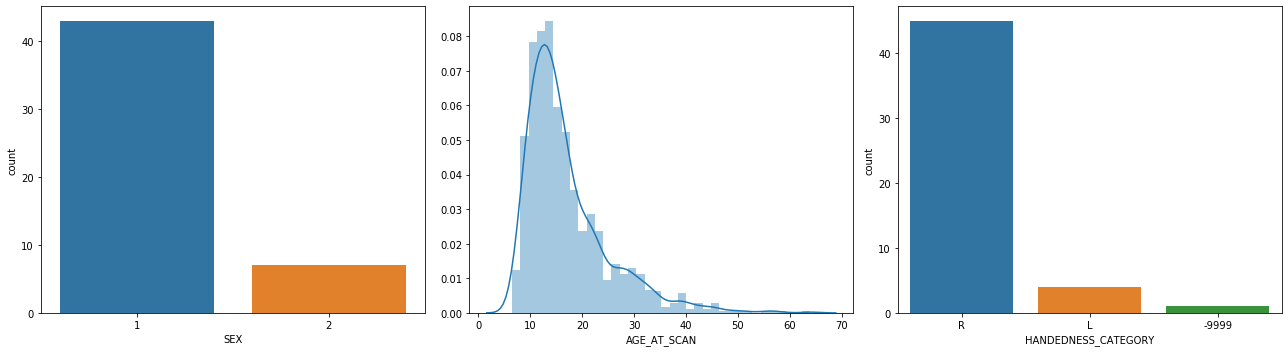

In [118]:
f, (ax1, ax2) = plt.subplots(1,3, figsize=(18,5))

sns.countplot(x='SEX', data=behav_short, ax=ax1)
sns.distplot(behav.AGE_AT_SCAN, ax=ax2)
sns.countplot(x='HANDEDNESS_CATEGORY',data=behav_short, ax=ax3 )

f.tight_layout()
plt.show()

# Actual RS + behav

## Q1: Relationship between IQ and

Does IQ influence resting state connectivity in people with/without ASD differently?
Is there an interaction between IQ and diagnostics?

### Similarity matrix --> modularity index

In [272]:
from community import community_louvain
import networkx as nx

In [273]:
part = community_louvain.best_partition(G)


mod = community_louvain.modularity(part,G)
print("modularity:", mod)

modularity: 0.8055540757328388


In [274]:
def modfunction(data): 
    Modscores=[] 

    for person in data:
        G = nx.from_numpy_matrix(person)
        part = community_louvain.best_partition(G)
        mod = community_louvain.modularity(part,G)
        Modscores.append(mod)    
    return Modscores

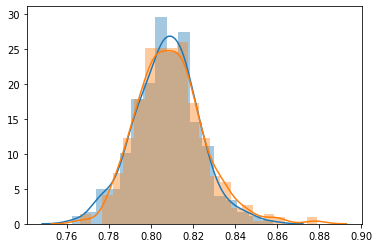

In [279]:
Modscore_Autism = modfunction(partial_correlation_matrices_ABIDE)

Modscore_control = modfunction(partial_correlation_matrices_control)

sns.distplot(Modscore_Autism)

sns.distplot(Modscore_control)